# Рабочая тетрадь 5

## Задание 1

Создайте класс по работе с тригонометрическими функциями. В классе
должны быть реализованы функции вычисления:
− косинуса;
− синуса;
− тангенса;
− арксинуса;
− арккосинуса;
− арктангенса;
− перевода из градусов в радианы.

In [10]:
import math

class Trigonom:
    
    def cos(a):
        return math.cos(a)
    
    def sin(a):
        return math.sin(a)
    
    def tan(a):
        return math.tan(a)
    
    def asin(a):
        return math.asin(a)
    
    def acos(a):
        return math.acos(a)
    
    def atan(a):
        return math.atan(a)
    
    def rad(a):
        return a*math.pi/180

print(Trigonom.cos(1))
print(Trigonom.sin(5))
print(Trigonom.tan(2))
print(Trigonom.asin(0.5))
print(Trigonom.acos(1))
print(Trigonom.atan(1))
print(Trigonom.rad(45))

0.5403023058681398
-0.9589242746631385
-2.185039863261519
0.5235987755982989
0.0
0.7853981633974483
0.7853981633974483


## Задание 2

Представьте дерево показанное на рисунке с использованием списка из
списков. Выведите на печать корень дерева, а также его левое и правое
поддеревья.
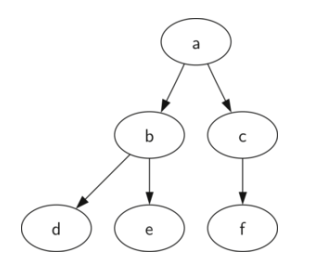

In [12]:
T = ["a",["b", ["d", "e"]], ["c", ["f"]]]
print("Корень: ", T[0])
print("Левое поддерево: ", T[1][0], T[1][1][0], T[1][1][1])
print("Правое поддерево: ", T[2][0], T[2][1][0])

Корень:  a
Левое поддерево:  b d e
Правое поддерево:  c f


## Задание 3

Дан класс, описывающий бинарное дерево.

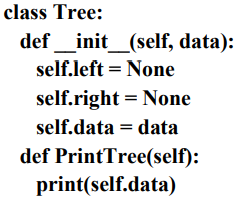
    
Реализуйте в классе функцию для вставки нового элемента в дерево по
следующим правилам:
    
    Левое поддерево узла содержит только узлы со значениями меньше, чем значение в узле.
    Правое поддерево узла содержит только узлы со значениями меньше, чем значение в узле.
    Каждое из левого и правого поддеревьев также должно быть бинарным деревом поиска.
    Не должно быть повторяющихся узлов.
Метод вставки сравнивает значение узла с родительским узлом и решает
куда доваить элемент (в левое или правое поддерево). Перепишите, метод
PrintTree для печати полной версии дерева

In [13]:
class Node:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data

    def insert(self, data):
        if self.data:
            if data < self.data:
                if self.left is None:
                    self.left = Node(data)
                else:
                    self.left.insert(data)
            if data > self.data:
                if self.right is None:
                    self.right = Node(data)
                else:
                    self.right.insert(data)
        else:
            self.data = data

    def PrintTree(self):
        if self.left:
            self.left.PrintTree()
        print(self.data),
        if self.right:
            self.right.PrintTree()

root = Node(12)
root.insert(6)
root.insert(14)
root.insert(3)
root.PrintTree()

3
6
12
14


## Задание 4

Постройте классификатор на основе дерева принятия решений
следующего датасета:
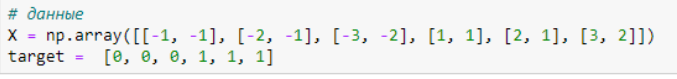

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

y = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X = [0, 0, 0, 1, 1, 1]

new_y = np.array(X)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
df2 = pd.DataFrame(y)
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2'}, inplace = False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
dataset

,y,x1,x2
0,0,-1,-1
1,0,-2,-1
2,0,-3,-2
3,1,1,1
4,1,2,1
5,1,3,2


In [2]:
dataset.shape

(6, 3)

In [3]:
dataset.head()

,y,x1,x2
0,0,-1,-1
1,0,-2,-1
2,0,-3,-2
3,1,1,1
4,1,2,1


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[:, : -1], # все колонки кроме последней в признаки
    dataset.iloc[:, -1], # последняя в целевую переменную (класс)
    test_size = 0.20 # размер тестовой выборки - 20%
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4, 2), (2, 2), (4,), (2,))

In [5]:
X_train.head()

,y,x1
4,1,2
2,0,-3
0,0,-1
1,0,-2


In [6]:
y_train.head()

4    1
2   -2
0   -1
1   -1
Name: x2, dtype: int32

In [7]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'X[1] <= -2.5\ngini = 0.625\nsamples = 4\nvalue = [1, 2, 1]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.6, 0.5, 'X[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]')]

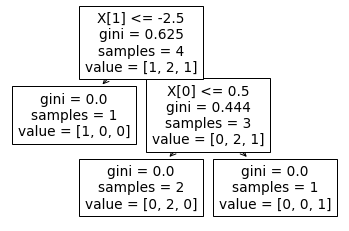

In [8]:
from sklearn import tree

tree.plot_tree(classifier)

In [9]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

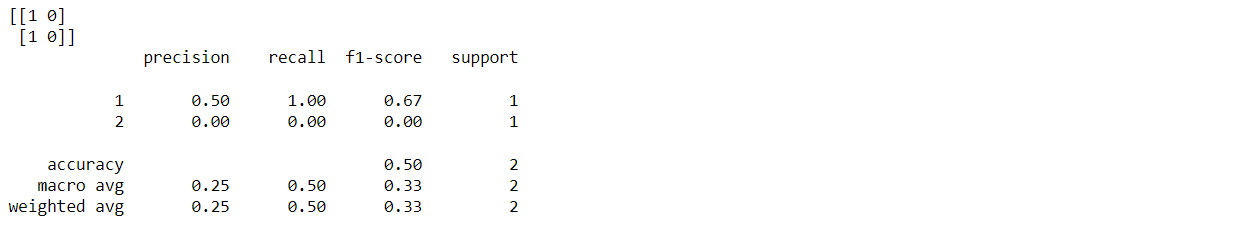

## Задание 5

Постройте модель регрессии для данных из предыдущей рабочей
тетради.Для примера можно взять потребления газа (в миллионах
галлонов) в 48 штатах США или набор данных о качестве красного вина:
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv
Постройте прогноз. Оцените точность модели.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = r'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
dataset = pd.read_csv(url)
dataset.head()

print(dataset.shape)
dataset.describe()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [146]:
from sklearn.tree import DecisionTreeRegressor
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[0.7   0.88  0.76  ... 0.51  0.645 0.31 ]


DecisionTreeRegressor()

[Text(0.41717453319502074, 0.9615384615384616, 'X[1] <= 0.535\nsquared_error = 0.033\nsamples = 1279\nvalue = 0.53'),
 Text(0.16727178423236513, 0.8846153846153846, 'X[1] <= 0.375\nsquared_error = 0.008\nsamples = 666\nvalue = 0.392'),
 Text(0.08609958506224066, 0.8076923076923077, 'X[1] <= 0.285\nsquared_error = 0.003\nsamples = 263\nvalue = 0.301'),
 Text(0.04253112033195021, 0.7307692307692307, 'X[1] <= 0.225\nsquared_error = 0.002\nsamples = 90\nvalue = 0.24'),
 Text(0.01867219917012448, 0.6538461538461539, 'X[1] <= 0.17\nsquared_error = 0.001\nsamples = 25\nvalue = 0.186'),
 Text(0.008298755186721992, 0.5769230769230769, 'X[3] <= 2.15\nsquared_error = 0.0\nsamples = 4\nvalue = 0.13'),
 Text(0.004149377593360996, 0.5, 'squared_error = 0.0\nsamples = 3\nvalue = 0.12'),
 Text(0.012448132780082987, 0.5, 'squared_error = -0.0\nsamples = 1\nvalue = 0.16'),
 Text(0.029045643153526972, 0.5769230769230769, 'X[1] <= 0.195\nsquared_error = 0.0\nsamples = 21\nvalue = 0.197'),
 Text(0.02074688

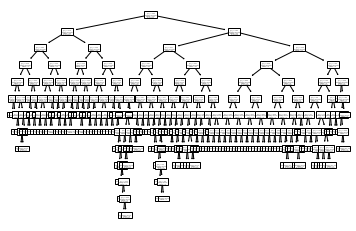

In [147]:
from sklearn import tree
tree.plot_tree(regressor)

In [152]:
y_pred = regressor.predict(X_test)
y_pred

array([0.47 , 0.825, 0.29 , 0.645, 0.45 , 0.64 , 0.715, 0.36 , 0.95 ,
       0.73 , 0.52 , 0.68 , 0.5  , 1.035, 0.58 , 0.31 , 0.28 , 0.4  ,
       0.6  , 0.59 , 0.66 , 0.53 , 0.51 , 0.33 , 0.365, 0.64 , 0.58 ,
       0.34 , 0.38 , 0.47 , 0.24 , 0.42 , 0.56 , 0.68 , 0.84 , 0.33 ,
       0.63 , 0.54 , 0.4  , 0.55 , 0.46 , 0.48 , 0.4  , 0.49 , 0.41 ,
       0.81 , 0.57 , 0.36 , 0.52 , 0.28 , 0.45 , 0.32 , 0.41 , 0.47 ,
       0.31 , 0.6  , 0.53 , 0.63 , 0.36 , 0.58 , 0.67 , 0.41 , 0.44 ,
       0.36 , 0.66 , 0.44 , 0.695, 0.645, 0.34 , 0.53 , 0.77 , 0.32 ,
       0.735, 0.51 , 0.48 , 0.49 , 0.57 , 0.34 , 0.5  , 0.39 , 0.48 ,
       0.39 , 0.44 , 0.29 , 0.64 , 0.67 , 0.39 , 0.655, 0.52 , 0.735,
       0.52 , 0.61 , 0.58 , 0.58 , 0.27 , 0.77 , 0.27 , 0.5  , 0.55 ,
       0.36 , 0.32 , 0.27 , 0.635, 0.12 , 0.52 , 0.67 , 0.52 , 0.59 ,
       0.56 , 0.715, 0.61 , 0.77 , 0.37 , 0.725, 0.77 , 0.45 , 0.53 ,
       0.4  , 0.76 , 0.51 , 0.58 , 0.5  , 0.46 , 0.5  , 0.66 , 0.37 ,
       0.43 , 0.41 ,

In [153]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,0.470,0.470
1,0.820,0.825
2,0.290,0.290
3,0.645,0.645
4,0.450,0.450
...,...,...
315,0.270,0.270
316,0.390,0.390
317,0.340,0.340
318,0.765,0.770


In [154]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error: 6.640625000000026e-06
Mean Absolute Error: 0.00042187500000009


In [155]:
metrics.mean_absolute_error(y_test, y_pred) / np.average(y) * 100

0.07992773864466121